# Finding the Best Markets

The main goal of this project is to find the two best markets to advertise in for an e-learning company that teaches computer science.

I'll do this with just a handful of basic descriptive statistics, using a free data set from freeCodeCamp. This data set is from their 2017 New Coder Survey.

In [116]:
# Explore the dataset.
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',
                  low_memory=0)
data.shape

(18175, 136)

In [117]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is quite a large dataset in terms of having a ton of columns. I will narrow it down soon into the columns we want. I've opted to use this dataset because it would be way more expensive to collect data when you can just use pre-existing relevant data that is free.

The dataset can be found at https://github.com/freeCodeCamp/2017-new-coder-survey

In [140]:
# Shrink down the data
cols = ['JobRoleInterest', 'CountryLive', 'MoneyForLearning',
       'MonthsProgramming', 'AttendedBootcamp']
df = data[cols]
df.shape

(18175, 5)

Alright, now the data is shrunk down to the main four columns I'm interested in working with so lets get cracking. The three questions I want to tackle are:

1. Where are new coders located?
2. What are the locations with the highest number of new coders?
3. How much money are they willing to spend on learning?

The population we have is new coders interested in a variety of things: data science, web development, video game development, etc. I'm going to first explore if we have a decently representative sample.

# Sample

In [141]:
# Frequency distribution of Jobs people are interested in
print(df['JobRoleInterest'].unique())
print(df['JobRoleInterest'].value_counts(normalize=True)*100)

[nan 'Full-Stack Web Developer'
 '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer'
 ... '  Data Scientist, Game Developer,   Quality Assurance Engineer'
 'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin'
 '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist ']
Full-Stack Web Developer                                                                                                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                                                      

Seems like there are A LOT of different career paths people are interested in. The sample isn't wildly representative. This category is also kind of a mess because it was clearly just a text input variable. There are lots of things that are esoteric, for example "I dont know what most of these are lol.'

Regardless, seems like most people want to be front end web developers or Data Scientists. A significant portion of people also are interested in more than one thing.

Most of the courses the company offers are mobile and web development. So I'll try to glean some info on those.

In [142]:
interests_no_nulls = df['JobRoleInterest'].dropna()

# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


So, in the code chunk above we looked through the job interest column and just got the number of people who are interested in either web or mobile development (or both). Let' take a quick look visually:

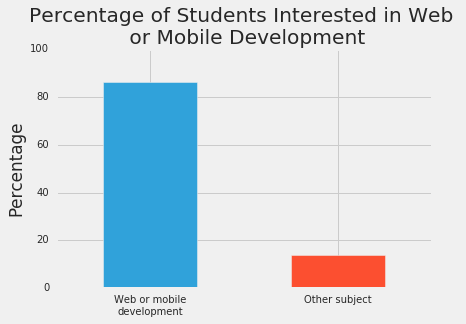

In [143]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Percentage of Students Interested in Web \n or Mobile Development')
plt.ylabel('Percentage')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim(0,100)
plt.show()

So, there we have it. The overwhelming majority of students are interested in web or mobile development, and this website teaches primarily web and mobile development, so we have a decently representative population.

The only thing I would caution against here is that a very small proportion actually chose explicitly just one, the other, or both. Many students chose web or mobile development as a part of many interests. As such, many people who chose it might be very tangentially interested. That being said, almost 20% of the people are interested in being a full-stack or front end web developer.

# Where are the new coders?
## And where are they concentrated?

Remember, we're trying to choose the two best markets. So let's look at where people live. The data are at the country level, so essentially we will determine the two best countries to advertise in.

In [144]:
# Drop everyone whose not interested in mobile or web dev.
new_df = df[df['JobRoleInterest'].notnull()]

# Get frequency tables
absolute_freq = new_df['CountryLive'].value_counts()
relative_freq = new_df['CountryLive'].value_counts(normalize=True)*100
freqs = pd.DataFrame(data = {'Absolute frequency': absolute_freq, 
                     'Percentage': relative_freq})
print(freqs.head(10))

                          Absolute frequency  Percentage
United States of America                3125   45.700497
India                                    528    7.721556
United Kingdom                           315    4.606610
Canada                                   260    3.802281
Poland                                   131    1.915765
Brazil                                   129    1.886517
Germany                                  125    1.828020
Australia                                112    1.637906
Russia                                   102    1.491664
Ukraine                                   89    1.301550


So, clearly at first blush the two best markets to advertise in here are the United States and India. 

This doesn't tell the whole story though - just because more people are wanting to learn, does not mean they are willing to spend money. So lets take a peek at how much money people are willing to spend in these markets.

We're going to narrow down and look at money spent in USA, India, United Kingdom, and Canada. We will then have lots of data, and English is an official language in each of these places.

# How much money are new coders spending?
## In the USA, India, the United Kingdom, and Canada

In [145]:
# Isolate only the countries of interest 
new_df = new_df[new_df['CountryLive'].notnull()]
only_4 = new_df[new_df['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Some students said 0 months coding, so we need to replace
# All the 0s with 1s to avoid dividing by 0
only_4['MonthsProgramming'].replace(0,1, inplace = True)

only_4['Money_per_month'] = only_4['MoneyForLearning'] / only_4['MonthsProgramming']
only_4['Money_per_month'].isna().sum()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


313

There are 313 students with na values for money per month - Let's just drop the nulls for both the new column and the country column

In [146]:
only_4 = only_4[only_4['Money_per_month'].notnull()]
only_4 = only_4[only_4['CountryLive'].notnull()]

Now, lets look at the average money per month spent, by country, in the countries we care about.

In [147]:
# Mean sum of money spent by students each month
only_4['Money_per_month'].groupby(only_4['CountryLive']).mean()


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Money_per_month, dtype: float64

The most money per month is being spent in the USA and India. This aligns with the previous analysis. It is odd that the United Kingdom seems to spend less than 1/3rd the amount the other three countries spend. Let's look at the distribution of this spending in the four countries.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


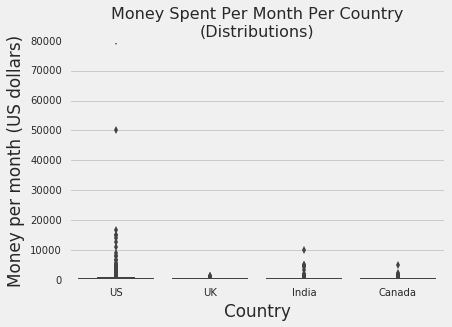

In [148]:
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.boxplot(y = 'Money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Seemingly, two people in the US spent over $50k a month on coding. Doubtful - lets remove.

In [149]:
# Isolate only those participants who spend less than 10000 per month# Isolat 
only_4 = only_4[only_4['Money_per_month'] < 20000]

# Mean sum of money spent by students each month
only_4['Money_per_month'].groupby(only_4['CountryLive']).mean()


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


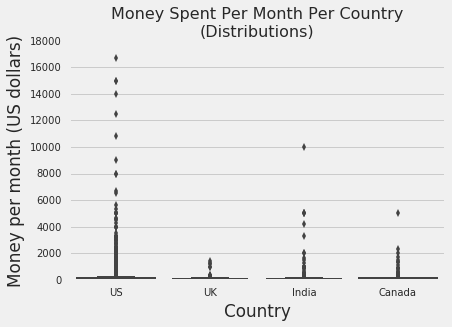

In [150]:
# Box plots to visualize distributions
sns.boxplot(y = 'Money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Given we aren't marketing to people who take bootcamps, or who can afford bootcamps, I'm just going to remove everyone who has taken one, and redo these averages.

In [153]:
only_4 = only_4[only_4['AttendedBootcamp'] == 0]

# Mean sum of money spent by students each month
only_4['Money_per_month'].groupby(only_4['CountryLive']).mean()


CountryLive
Canada                       64.127841
India                       133.369810
United Kingdom               34.468329
United States of America    101.964014
Name: Money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


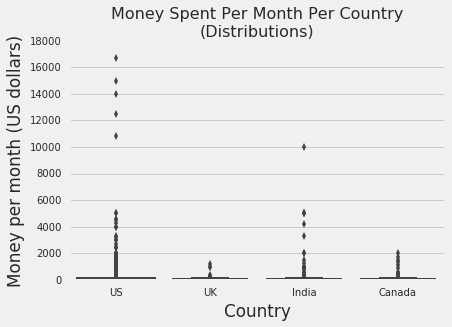

In [154]:
# Box plots to visualize distributions
sns.boxplot(y = 'Money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are still clear outliers here. I'm going to remove everyone in india who spent over \$2000 a month, and everyone in the US who spent over \$6000. 

In [156]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Money_per_month'] > 6000)]

india_outliers = only_4[
    (only_4['CountryLive'] == 'India') &
    (only_4['Money_per_month'] > 2000)
]

# Remove the extreme outliers for US and India
only_4 = only_4.drop(us_outliers.index)
only_4 = only_4.drop(india_outliers.index)

# Mean sum of money spent by students each month
only_4['Money_per_month'].groupby(only_4['CountryLive']).mean()

CountryLive
Canada                      64.127841
India                       62.611370
United Kingdom              34.468329
United States of America    76.350634
Name: Money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


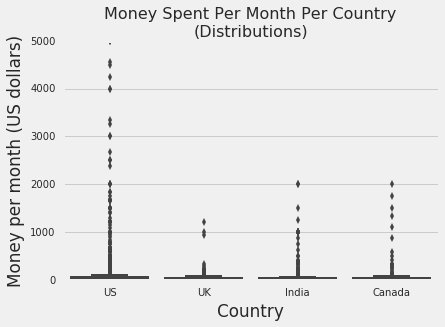

In [157]:
# Box plots to visualize distributions
sns.boxplot(y = 'Money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

So, gunning towards choosing the two markets, the United States is clearly one of them.

The other is choosing between Canada and india. The people in Canada seem to be willing to spend a little bit more money per month, but its only \$2 difference. On top of this, there are, if you recall, about twice as many people in India. Let's recalculate this since we've dropped folks.

In [158]:
# Get frequency tables
absolute_freq = only_4['CountryLive'].value_counts()
relative_freq = only_4['CountryLive'].value_counts(normalize=True)*100
freqs = pd.DataFrame(data = {'Absolute frequency': absolute_freq, 
                     'Percentage': relative_freq})
print(freqs.head(10))

                          Absolute frequency  Percentage
United States of America                2674   73.785872
India                                    448   12.362031
United Kingdom                           272    7.505519
Canada                                   230    6.346578


As suspected - twice as many people in India as Canada who are interested in learning to be web or mobile developers.

Based on this, I would choose to advertise in the United States and in India.

# Conclusions

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

-  60% for the US, 25% for India, 15% for Canada.
-  50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

-  70% for the US, and 30% for India.
- 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.